In [1]:
# Import Memspectrum
from memspectrum import MESA

import numpy as np

np.random.seed(0)

import matplotlib.pyplot as plt

%matplotlib inline 

In [2]:
# Making dataset from pedestrian 0 movments 

person_0_X_2 = [767, 765, 759, 753, 755, 752, 753, 753, 745, 746, 746, 740, 730, 727]

person_0_Y_2 = [1243, 1239, 1230, 1227, 1222, 1217, 1217, 1216, 1207, 1198, 1188, 1175, 1165, 1155]

person_0_X_5 = [767, 763, 752, 752, 746, 727, 716, 718, 717, 715, 711, 703, 699, 700]

person_0_Y_5 = [1243, 1229, 1217, 1212, 1188, 1160, 1148, 1139, 1126, 1124, 1101, 1083, 1078, 1076]

person_0_X_10 = [797, 794, 767, 752, 746, 716, 717, 711, 699, 690, 689, 689, 687, 685]

person_0_Y_10 = [1326, 1303, 1243, 1217, 1188, 1148, 1126, 1101, 1078, 1073, 1065, 1058, 1050, 1046]

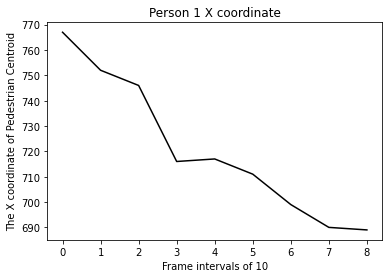

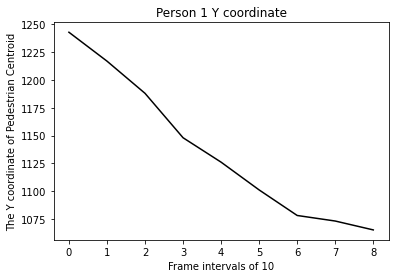

In [3]:
N, dt = 10, 1  # Number of samples and sampling interval
no_pred = 2
time = np.arange(0, N) * dt

plt.plot(time[:-1], person_0_X[:-1], color = 'k')
plt.title("Person 1 X coordinate")
plt.xlabel("Frame intervals of 10")
plt.ylabel("The X coordinate of Pedestrian Centroid")
plt.show()

plt.plot(time[:-1], person_0_Y[:-1], color = 'k')
plt.title("Person 1 Y coordinate")
plt.xlabel("Frame intervals of 10")
plt.ylabel("The Y coordinate of Pedestrian Centroid")
plt.show()

In [4]:
M = MESA()
M.solve(person_0_X[:-no_pred])
forecast = M.forecast(person_0_X[:-no_pred], length = no_pred, number_of_simulations = no_pred*10000, 
include_data = False)
median_X = np.median(forecast, axis = 0) # Ensemble median
average_X = np.average(forecast, axis=0)

ValueError: could not broadcast input array from shape (8,) into shape (20000,0)

In [5]:
M.solve(person_0_Y[:-no_pred])
forecast = M.forecast(person_0_Y[:-no_pred], length = no_pred, number_of_simulations = no_pred*10000, 
include_data = False)
median_Y = np.median(forecast, axis = 0) # Ensemble median
average_Y = np.average(forecast, axis=0)

NameError: name 'median_X' is not defined

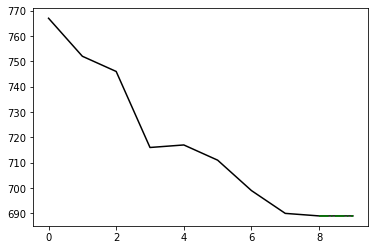

In [8]:
plt.plot(time, person_0_X, color = 'k')
plt.plot(time[N-no_pred:], person_0_X[N-no_pred:], color = 'g', linestyle = '-.', label = 'Observed data')
plt.plot(time[N-no_pred:], median_X, color = 'r', label = 'median estimate')
plt.plot(time[N-no_pred:], average_X, color = 'b', label = 'average estimate')
plt.title("Person 1 X coordinate prediction")
plt.xlabel("Frame intervals of 10")
plt.ylabel("The X coordinate of Pedestrian Centroid")
plt.show()

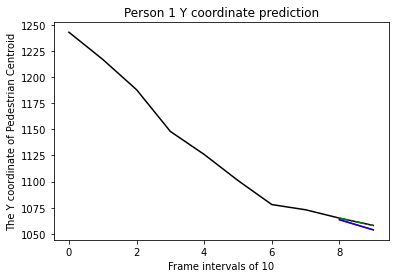

In [7]:
plt.plot(time, person_0_Y, color = 'k')
plt.plot(time[N-no_pred:], person_0_Y[N-no_pred:], color = 'g', linestyle = '-.', label = 'Observed data')
plt.plot(time[N-no_pred:], median_Y, color = 'r', label = 'median estimate')
plt.plot(time[N-no_pred:], average_Y, color = 'b', label = 'average estimate')
plt.title("Person 1 Y coordinate prediction")
plt.xlabel("Frame intervals of 10")
plt.ylabel("The Y coordinate of Pedestrian Centroid")
plt.show()

In [9]:
# Sum Squared Error just as a quick evaluation
#real_X_values = person_0_X[N-no_pred:]
#print("Real X Values = ", real_X_values)
real_Y_values = person_0_Y[N-no_pred:]
print("Real Y Values = ", real_Y_values)
#print("Median X Values = ", median_X)
#print("Average X Value = ", average_X)
print("Median Y Values = ", median_Y)
print("Average Y Value = ", average_Y)
#SSE_X = np.sum((real_X_values - median_X)**2)
SSE_Y = np.sum((real_Y_values - median_Y)**2)
#SSR_X = np.sum((real_X_values - average_X)**2)
SSR_Y = np.sum((real_Y_values - average_Y)**2)
#SST_X = np.sum(SSR_X + SSE_X)
SST_Y = np.sum(SSR_Y + SSE_Y)
#print("SSE X = ", SSE_X)
print("SSE Y = ", SSE_Y)
#print("SSR X = ", SSR_X)
print("SSR Y = ", SSR_Y)
#print("SST X = ", SST_X)
print("SST Y = ", SST_Y)

Real Y Values =  [1065, 1058]
Median Y Values =  [1063.43773762 1053.72356653]
Average Y Value =  [1063.51614376 1053.80289487]
SSE Y =  20.72854699242944
SSR Y =  19.817520783638685
SST Y =  40.54606777606813


In [10]:
person_0_final_coordinate = [0, 1063]

print ("Person 0 Final Coordinates: ", str(person_0_final_coordinate))

Person 0 Final Coordinates:  [0, 1063]
